# Predictive Decision Tree and Multiple Linear Regression on Car Prices

#### Submitted by Darien Nguyen, Student ID 010573528, Capstone for WGU's MSDA Program

## Table of Contents:
<ul>
<li><a href="#PartA">A: Research Question</a></li>
<li><a href="#PartB">B: Data Collection</a></li>
<li><a href="#PartC">C: Data Extraction and Preparation</a></li>
<li><a href="#PartD">D: Decision Tree and Multiple Linear Regression</a></li>
<li><a href="#PartE">E: Data Summary and Implications</a></li>
<li><a href="#PartF">F: Source References</a></li>        
</ul>

<a id='PartA'></a>
# A: Research Question

#### This research project seeks to assess the effectiveness of machine learning models, including Decision Trees Classifiers (DTC) and Multiple Linear Regression (MLR), in predicting car prices based on the dataset provided by Carvana. The aim is to determine the extent to which these models can accurately forecast prices, considering the Mean Absolute Percentage Error (MAPE). By evaluating and comparing the performance of these models, the project aims to provide valuable insights into which machine learning algorithms are best suited for enhancing Carvana's pricing strategies and overall competitiveness in the dynamic online car sales market. The research will contribute to a deeper understanding of the predictive capabilities of these models and their potential impact on the company's pricing decisions. Ultimately, the findings will inform data-driven strategies to improve price estimation accuracy, potentially leading to increased customer trust and satisfaction while supporting Carvana's sustainable growth in the digital automotive marketplace.

#### Carvana is a prominent player in the online car dealership industry, known for its innovative approach to selling both used and new cars to customers across the United States. As an online platform, Carvana operates in a dynamic and highly competitive market where pricing accuracy is crucial for maintaining profitability and customer satisfaction. In this digital age, consumers have access to a wealth of information, allowing them to make informed decisions based on fair market values. Consequently, Carvana faces the challenge of adapting rapidly to the ever-changing supply and demand dynamics of the automotive market.

#### To address this challenge, Carvana relies on data-driven approaches, leveraging advanced machine learning models to predict and set competitive prices for the cars in its inventory. The ability to accurately estimate car prices is not only essential for ensuring profitability but also for providing customers with fair and transparent pricing. However, the complexity of factors influencing car prices, such as mileage, year, and various qualitative features, poses a significant challenge (Jin, 2021). During Jins’ (2021) research they were able to produce several meaningful predictive models based on similar factors for used car prices within their dataset and found varying means of error from each model.

#### The research question for this capstone project is, "to what extent can machine learning models, such as Decision Trees and Multiple Linear Regression, predict car prices on the research dataset?"

#### The hypotheses for this analysis are as followed:
#### Hypothesis: Null hypothesis - The selected machine learning models, including DTC and MLR, cannot accurately predict the prices of cars from the research data with a MAPE of less than 20%.

#### Alternate Hypothesis – The selected machine learning models, including DTC and MLR, can accurately predict the prices of cars from the research data with a MAPE of less than 20%.

#### For the means of this project, a MAPE of less than 20% was selected as the benchmark in order to deem an "effective" model.

<a id='PartB'></a>
# B: Data Collection
#### The data needed to generate a predictive model was scrapped through Carvana.com/car website and uploaded to Kaggle by the owner Ravi Shah titled, “[Carvana - Predict Car Prices](https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices)” on January 2023. This dataset was selected due to its similarity to Jin’s (2021) study as both revolve around predictive models and car pricing, thus giving reason to select this data to expand upon their research. Since the dataset was uploaded to Kaggle, it follows the CC0: Public Domain License and is free to use and download to users. The dataset holds over 22,000 rows of data collected from the first 1,000 pages from the site. The data consists of four columns with zero sparseness. The field and data type are as followed:
	
#### Name: Make and model of the car. Qualitative data.
	
#### Year: Manufacture date of car.	Qualitative data.
	
#### Miles: Mileage on car in miles. Quantitative data.
	
#### Price: Carvanas price point of car in U.S. Dollars. Quantitative data
	
#### However, it is important to note certain limitations associated with the dataset. It lacks certain variables that can influence car pricing, such as color, package details, and information about damages. These details, while not included in this dataset, can be considered in future studies to potentially improve the accuracy of price predictions. Additionally, the dataset is specific to the United States market and does not account for variations in other global markets. Consequently, the predictive models may have limited applicability beyond the U.S. market, although the underlying methodology can be adapted for different datasets.

#### Due to the simplicity of the data, no delimitations would be set.

#### The advantage of sourcing my data from Kaggle is due to its readily availability and usability. The data is downloadable as .csv file which is easy to open and load into Pandas as a dataframe. With that, Kaggle users tend to clean and preprocess their datasets before uploading, thus making that process easier for this and other further analysis.

#### The disadvantage that arises is that the data lacks updated information. Consequently, trends, seasonalities, and the market might be missed until a new upload is provided. This does not alter the functionality of the models and only affects the dollars that might be gained or lost at the time of the analysis.

#### No challeges were encountered during the collection process of the dataset.

<a id='PartC'></a>
# C: Data Extraction and Preparation

#### The need to preprocess the dataset is essential for optimizing the machine model, as explained by Nongthombam and Sharma (2021), whilst using Pythons free libraries such as Pandas and NumPy. In this analysis, null values and irregularities will be removed from the dataset to create formality. Cell size is 22,000 rows by 4 columns which equates to 88,000 cells. Data sparsity will be reduced to 0% after data cleaning and processing. No further processing or transformations will be conducted on the dataset due to its simplicity.

#### The study design involves using DTC and MLR for categorizing car prices and predicting them based on features of year and mileage, similar to that of Jin (2021). Visual assessment tools like scatter plots and histograms of residuals will provide insights into data distribution and model performance. Python and Scikit-Learn will be used for efficient implementation, including data preprocessing, training, and evaluation. The dataset will be split into 80% training and 20% testing. A paired T-tests will compare Mean Absolute Errors (MAE) between models to ensure significance (Wilkerson, 2018).

#### The chosen tools and techniques are thoughtfully aligned with the project's objectives, ensuring a comprehensive analysis. Python was selected as the primary language for its versatility, extensive libraries, and user-friendly syntax (Brittain et al., 2018). Pythons’ broad adoption in the data science community provides access to a rich ecosystem of ongoing resources. The reasoning for Python rather than R is due to its user-friendly usage and quick learning curve as described by Colliau et al. (2017). Due to SAS usage of the hard drive rather than RAM, it was left out of due to its known ability to be slower when running as compared to Python (Brittain et al., 2018).

## Cleaning
#### .isnull was used to find and remove any incomplete rows of data. Next, issues of false years were collected. A loop was created to count and delete any false years. The final dataset was saved and ready for analysis.

#### Visuals of the of the clean dataset were created.

In [1]:
#libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from scipy import stats 

#reading the file & printing first 20
df = pd.read_csv("carvana.csv")
print(df.shape)
df.head(20)

(22000, 4)


,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
5,Buick Encore,2019,47973,18590
6,Jeep Compass,2016,57159,17590
7,Jeep Compass,2017,47619,18590
8,Jeep Patriot,2015,51472,17590
9,Jeep Compass,2016,33218,17990


In [2]:
#deleting Null values
df.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

In [3]:
#counting and deleting number of false years
count = 0
for i, row in tqdm(df.iterrows()):
    if row["Year"]>3000:
        df = df.drop([i])
        count += 1  
    
print("Number of false years that we will delete: ", count)

0it [00:00, ?it/s]

Number of false years that we will delete:  2851


In [4]:
#Checking clean data
print(df.shape)
df.head(20)

(19149, 4)


,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
5,Buick Encore,2019,47973,18590
6,Jeep Compass,2016,57159,17590
7,Jeep Compass,2017,47619,18590
8,Jeep Patriot,2015,51472,17590
9,Jeep Compass,2016,33218,17990
10,Jeep Compass,2016,73580,16590


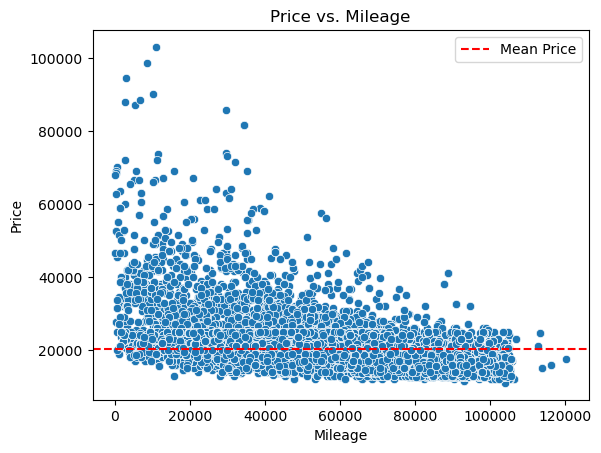

In [5]:
# Create a scatter plot of Price vs. Mileage
ax = sns.scatterplot(data=df, x="Miles", y="Price")

# Calculate the mean of the "Price" variable
mean_price = df["Price"].mean()

# Add a horizontal mean line to the plot
ax.axhline(mean_price, color='r', linestyle='--', label='Mean Price')

# Set title and labels
ax.set_title("Price vs. Mileage")
ax.set_xlabel("Mileage")
ax.set_ylabel("Price")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

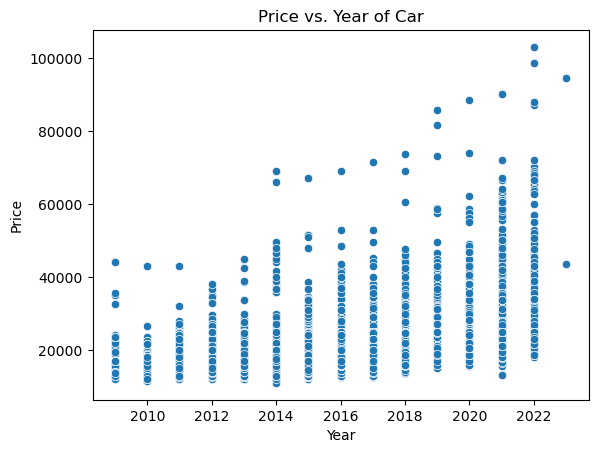

In [6]:
ax = sns.scatterplot(data=df, x="Year", y="Price")
ax.set_title("Price vs. Year of Car")
plt.show()

<a id='PartD'></a>

# D: Decision Tree and Multiple Linear Regression
#### DTC and MLR were created. For each model, the MAE, Percentage of Error, Root Mean Squared Error (RMSE), R-squared (R²), and MAPE were calculated to assess their predictive accuracy and performance. The data was split into training and testing sets for each iteration (10 iterations in total) to evaluate model performance robustly. The residuals (prediction errors) for both models were examined through histograms to understand the distribution and accuracy of predictions. Additionally, a pairwise t-test was performed to determine if there is a significant difference in MAE between the Decision Tree and Multiple Linear Regression models, considering a significance level of 0.05. The scatter plots of actual prices against predicted prices were generated for both models to visualize the alignment between actual and predicted values, aiding in assessing model accuracy.

#### The selection of the analysis techniques, Decision Tree Model (DTC) and Multiple Linear Regression (MLR), was based on their suitability for predicting the 'Price' variable in the dataset. One advantage of using the DTC lies in its ability to handle non-linearity and interactions among features effectively. It can capture complex relationships in the data without assuming a specific functional form, making it a flexible choice for predictive modeling. On the other hand, a disadvantage of the DTC is its tendency to overfit the training data, especially with a deep tree. Overfitting can lead to excellent performance on training data but poor generalization to unseen data, impacting the model's predictive accuracy.

#### MLR, on the other hand, is advantageous for its interpretability and simplicity. It allows us to understand the relationship between the predictor variables and the target variable in a straightforward manner, expressed through coefficients. However, a limitation of MLR is its assumption of a linear relationship between predictors and the target variable. When this assumption is violated, the model's predictions may be inaccurate. 

#### Considering these factors, both DTC and MLR were chosen as they offer complementary advantages, with DTC being capable of capturing complex relationships while MLR providing interpretability. The ensemble of these models allows for a robust evaluation of the dataset and adds to Jin (2021) previous studies of machine learning models.

###### Mean Absolute Error (MAE): Calculation: MAE = (1 / n) * sum(abs(actual_price_i - predicted_price_i))
###### Root Mean Squared Error (RMSE): Calculation: RMSE = sqrt((1 / n) * sum((actual_price_i - predicted_price_i)^2))
###### Mean Absolute Percentage Error (MAPE): Calculation: MAPE = (1 / n) * sum(abs((actual_price_i - predicted_price_i) / actual_price_i) * 100)
###### R-squared (R²): Calculation: R² = 1 - sum((actual_price_i - predicted_price_i)^2) / sum((actual_price_i - mean_actual_price)^2)


In [7]:
# Define the features (X) and the target variable (y)
X = df.drop(['Price', 'Name'], axis=1)
y = df['Price']

# Initialize lists to store MAE values for each model
mae_dtc_values = []
rmse_dtc_values = []
r_squared_dtc_values = []
mape_dtc_values = []
percentage_error_dtc_values = []

mae_mlr_values = []
rmse_mlr_values = []
r_squared_mlr_values = []
mape_mlr_values = []
percentage_error_mlr_values = []

# Perform 10 calculations with different random train-test splits
for _ in range(10):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Create and train a Decision Tree model
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)
    mae_dtc = mean_absolute_error(y_test, y_pred_dtc)
    
    rmse_dtc = np.sqrt(mean_squared_error(y_test, y_pred_dtc))
    r_squared_dtc = r2_score(y_test, y_pred_dtc)
    mape_dtc = mean_absolute_percentage_error(y_test, y_pred_dtc) * 100

    # Calculate the percentage of error
    percentage_error_dtc = (mae_dtc / np.mean(y_test)) * 100
    
    mae_dtc_values.append(mae_dtc)
    rmse_dtc_values.append(rmse_dtc)
    r_squared_dtc_values.append(r_squared_dtc)
    mape_dtc_values.append(mape_dtc)
    percentage_error_dtc_values.append(percentage_error_dtc)

    # Create and train a Multiple Linear Regression model
    mlr_model = LinearRegression()
    mlr_model.fit(X_train, y_train)
    y_pred_mlr = mlr_model.predict(X_test)
    mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
    mae_mlr_values.append(mae_mlr)
    
    rmse_mlr = np.sqrt(mean_squared_error(y_test, y_pred_mlr))
    r_squared_mlr = r2_score(y_test, y_pred_mlr)
    mape_mlr = mean_absolute_percentage_error(y_test, y_pred_mlr) * 100

    # Calculate the percentage of error
    percentage_error_mlr = (mae_mlr / np.mean(y_test)) * 100
    
    mae_mlr_values.append(mae_mlr)
    rmse_mlr_values.append(rmse_mlr)
    r_squared_mlr_values.append(r_squared_mlr)
    mape_mlr_values.append(mape_mlr)
    percentage_error_mlr_values.append(percentage_error_mlr)

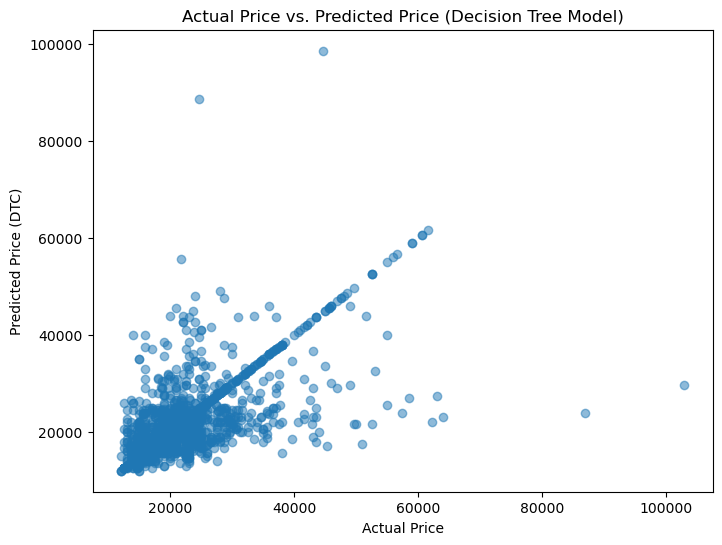

Decison Tree Model:
Mean Absolute Error (MAE): 1502.9229503916447
Percentage of Error (MAE as a percentage of the mean of actual prices): 7.390244000461405 %
Root Mean Squared Error (RMSE): 4579.05808554688
R-squared (R²): 0.4394919976799768
Mean Absolute Percentage Error (MAPE): 6.371879184988451 %


In [8]:
# Visualize the predicted vs. actual prices for multiple linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dtc, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (DTC)")
plt.title("Actual Price vs. Predicted Price (Decision Tree Model)")
plt.show()

print("Decison Tree Model:")
print("Mean Absolute Error (MAE):", sum(mae_dtc_values) / len(mae_dtc_values))
print("Percentage of Error (MAE as a percentage of the mean of actual prices):", sum(percentage_error_dtc_values) / len(percentage_error_dtc_values), "%")
print("Root Mean Squared Error (RMSE):", sum(rmse_dtc_values) / len(rmse_dtc_values))
print("R-squared (R²):", sum(r_squared_dtc_values) / len(r_squared_dtc_values))
print("Mean Absolute Percentage Error (MAPE):", sum(mape_dtc_values) / len(mape_dtc_values), "%")

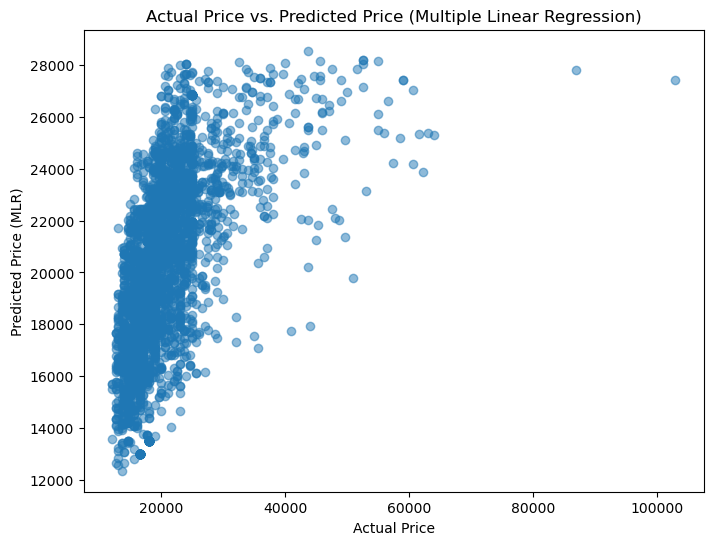

Multiple Linear Regression:
Mean Absolute Error (MAE): 3119.2200961409685
Percentage of Error (MAE as a percentage of the mean of actual prices): 15.339099098110276 %
Root Mean Squared Error (RMSE): 5048.628518023438
R-squared (R²): 0.3204628109968347
Mean Absolute Percentage Error (MAPE): 14.541320068828067 %


In [9]:
# Visualize the predicted vs. actual prices for multiple linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlr, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (MLR)")
plt.title("Actual Price vs. Predicted Price (Multiple Linear Regression)")
plt.show()

print("Multiple Linear Regression:")
print("Mean Absolute Error (MAE):", sum(mae_mlr_values) / len(mae_mlr_values))
print("Percentage of Error (MAE as a percentage of the mean of actual prices):", sum(percentage_error_mlr_values) / len(percentage_error_mlr_values), "%")
print("Root Mean Squared Error (RMSE):", sum(rmse_mlr_values) / len(rmse_mlr_values))
print("R-squared (R²):", sum(r_squared_mlr_values) / len(r_squared_mlr_values))
print("Mean Absolute Percentage Error (MAPE):", sum(mape_mlr_values) / len(mape_mlr_values), "%")

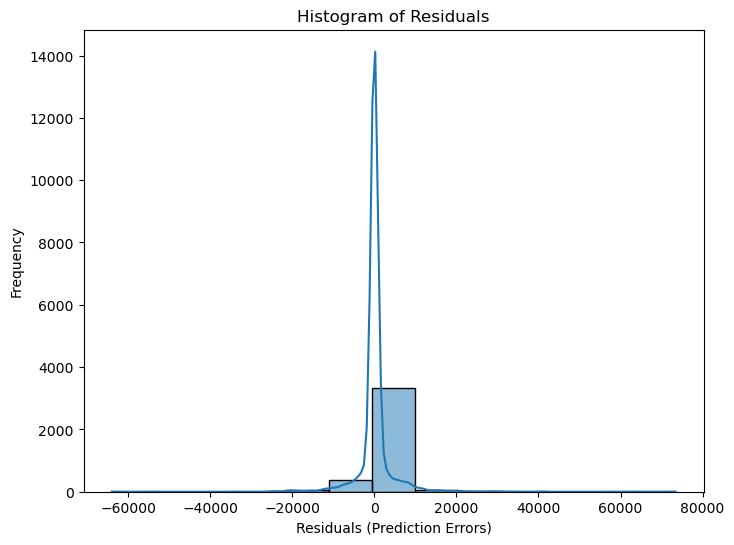

In [10]:
# Calculate the residuals (prediction errors)
residuals = y_test - y_pred_dtc

# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Prediction Errors)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

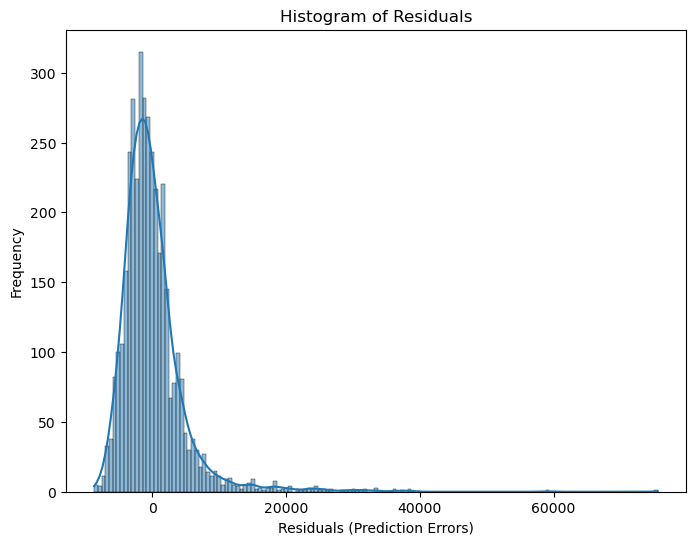

In [11]:
# Calculate the residuals (prediction errors)
residuals = y_test - y_pred_mlr

# Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Prediction Errors)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [12]:
# Perform pairwise t-tests
t_statistic_dtc_vs_mlr, p_value_dtc_vs_mlr = stats.ttest_ind(mae_dtc_values, mae_mlr_values)

# Set your significance level (e.g., 0.05)
alpha = 0.05

# Interpret the results based on the p-values)

if p_value_dtc_vs_mlr < alpha:
    print("Reject the null hypothesis: There is a significant difference between Decision Tree and Multiple Linear Regression.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Decision Tree and Multiple Linear Regression.")

Reject the null hypothesis: There is a significant difference between Decision Tree and Multiple Linear Regression.


In [13]:
from prettytable import PrettyTable

# Create a table instance
table = PrettyTable()

# Define the column names and alignment
table.field_names = ["Model", "Mean Absolute Error (MAE) (USD)", "Root Mean Squared Error (RMSE) (USD)", 
                     "Mean Absolute Percentage Error (MAPE) (%)", "R-squared (R²)"]

# Add data to the table
table.add_row(["Decision Tree (DTC)", 1500, 4550, 6.49, 0.417])
table.add_row(["Multiple Linear Regression (MLR)", 3100, 4890, 14.5, 0.329])

# Set the alignment
table.align = "l"

# Print the table
print(table)

+----------------------------------+---------------------------------+--------------------------------------+-------------------------------------------+----------------+
| Model                            | Mean Absolute Error (MAE) (USD) | Root Mean Squared Error (RMSE) (USD) | Mean Absolute Percentage Error (MAPE) (%) | R-squared (R²) |
+----------------------------------+---------------------------------+--------------------------------------+-------------------------------------------+----------------+
| Decision Tree (DTC)              | 1500                            | 4550                                 | 6.49                                      | 0.417          |
| Multiple Linear Regression (MLR) | 3100                            | 4890                                 | 14.5                                      | 0.329          |
+----------------------------------+---------------------------------+--------------------------------------+------------------------------------

<a id='PartE'></a>

# E: Data Summary and Implications
#### The rejection of the paired t-test null hypothesis suggests a significant difference in predictive performance between the two models, making the analysis statstically signifanct between the predictive models. In the context of the research question—to what extent can machine learning models, such as DTC and MLR, predict car prices on the research dataset?—the analysis concludes that both DTCs and MLRs both hold credibility as both were able to produce MAPEs of less the 20%.

#### The analysis reveals notable differences between the DTC and MLR in predicting car prices. DTC shows a lower MAE, RMSE, and MAPE compared to MLR. The R² values for both models indicate that DTC better explains the variance in the target variable compared to MLR. Due the DTCs lower MAE, RMSE, and MAPE we see a lower margin of loss in regards to USD when placing our predictive prices to use. As a car company, the need to accurately predict car prices with minimalist margin of error is essential to stay competetive and within market values. Based on the MAPE, DTCs showcase a 6.49% error from the actual price, whilst MLRs hold 14.5% from the actual. Essentially, DTCs mean percentage of error will hold a mean loss of 6.49% in car value if incorrectly predicted than compared to MLRs 14.5%.

#### Limitations from the analysis arise from its focus on its few subset of car features. Further inclusion of additional relevant factors and more data would enhance the predictive performance of future models. Moreover, other advanced machine learning models should be considered for comparison to identify the most suitable model for accurate predictions. 

#### Future studies should consider exploring more complex models like ensemble methods (e.g., Random Forest) or neural networks to further improve predictive accuracy. Additionally, investigating the impact of additional features and exploring feature engineering techniques could enhance the understanding of car price determinants and lead to better predictive models.

<a id='PartF'></a>

# F: Source References

#### Brittain, J., Cendon, M., Nizzi, J., & Pleis, J. (2018). [Data scientist’s analysis toolbox: Comparison of Python, R, and SAS Performance](https://scholar.smu.edu/cgi/viewcontent.cgi?article=1021&context=datasciencereview). SMU Data Science Review, 1(2), 7.

#### Colliau, T., Rogers, G., Hughes, Z., & Ozgur, C. (2017). [MatLab vs. Python vs. R](https://scholar.valpo.edu/cgi/viewcontent.cgi?article=1049&context=cba_fac_pub). Journal of Data Science, 15(3).

#### Jin, C. (2021, November). [Price Prediction of Used Cars Using Machine Learning](https://ieeexplore.ieee.org/document/9696839). In 2021 IEEE International Conference on Emergency Science and Information Technology (ICESIT) (pp. 223-230). IEEE.
 
#### Nongthombam, K., & Sharma, D. (2021). [Data Analysis using Python](https://d1wqtxts1xzle7.cloudfront.net/68540580/data_analysis_using_python_IJERTV10IS070241-libre.pdf?1628019760=&response-content-disposition=inline%3B+filename%3DIJERT_Data_Analysis_using_Python.pdf&Expires=1694805738&Signature=VY8CwUoyQ2tCIouNA6LFEvLpKLn~ALub0C1dCd-2a6dk~jQd0xWuh1UV~gYj8twtF6l4sMQlR9dYX9Jk-WXdL80WZXffMDeBmpks1ZM0jmH7wwe5PvHa8nkq-0OA81ckJq73oXwuTfEaZkon1S3jwo~N19YzIC5giisOTZB-qe3FQjTXpQGubja24eUxDFvY5jkjpmsyI1NgF7IwqVIfqwhhmMt2l1dDmKm~Pqf2Cz~bVLioCs8p9tvG-n1YNE5BwuluqFxGa0HF~5YQ4aOmbG1Y00S7mV~Eh-4NXM9P1xq1aVJa42Lk~D~q2WaVKVtBziVszIPC7cVmSWuwO06V5Q__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA). International Journal of Engineering Research & Technology (IJERT), 10(7).

#### Shah, R. (2023). Carvana - Predict Car Prices. Retrieved September, 2023 from https://www.kaggle.com/datasets/ravishah1/carvana-predict-car-prices/code.

#### Wilkerson, S. (2008). [Application of the Paired t-test](https://digitalcommons.xula.edu/cgi/viewcontent.cgi?article=1112&context=xulanexus). XULAneXUS, 5(1), 7.